In [1]:
import numpy as np
import pandas as pd
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./archive/co2_emission_data.csv")

In [39]:
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


one hot encoding the csv file

In [4]:
print(list(dataset.columns))

['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [5]:
#preprocessing data
one_hot_data = pd.get_dummies(dataset, columns = ['Make', 'Model', "Vehicle Class", "Transmission", "Fuel Type"])
print(one_hot_data.head())

   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                           33                  196        True   
1                           29      

In [6]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(dataset[feature], dataset['CO2 Emissions(g/km)'])
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Co2 Emission', fontsize=15);
    plt.title(" Co2 Emission vs. {} \n".format(feature), fontsize=20)

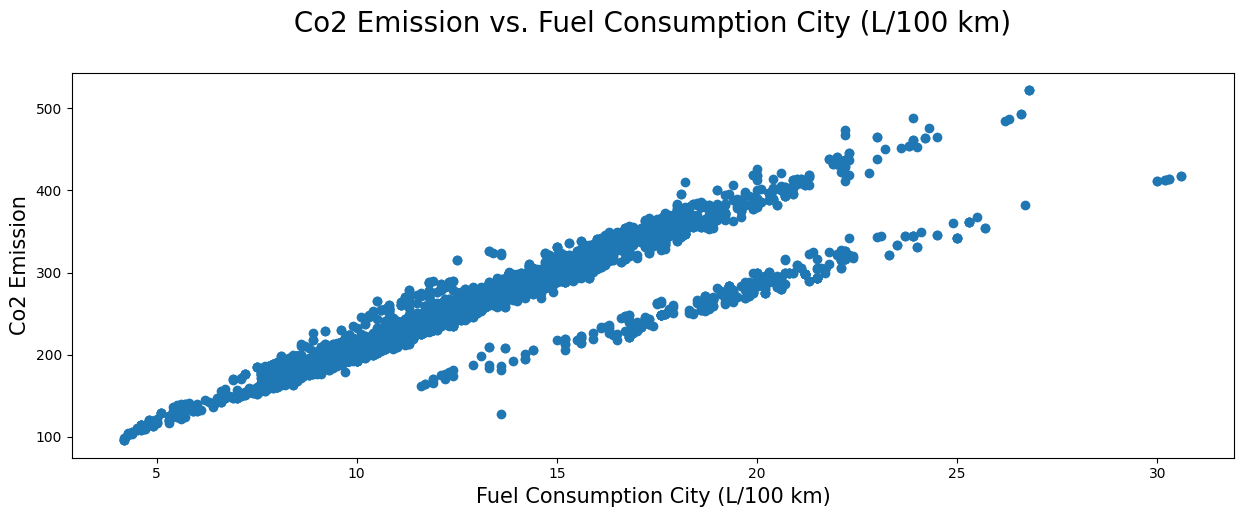

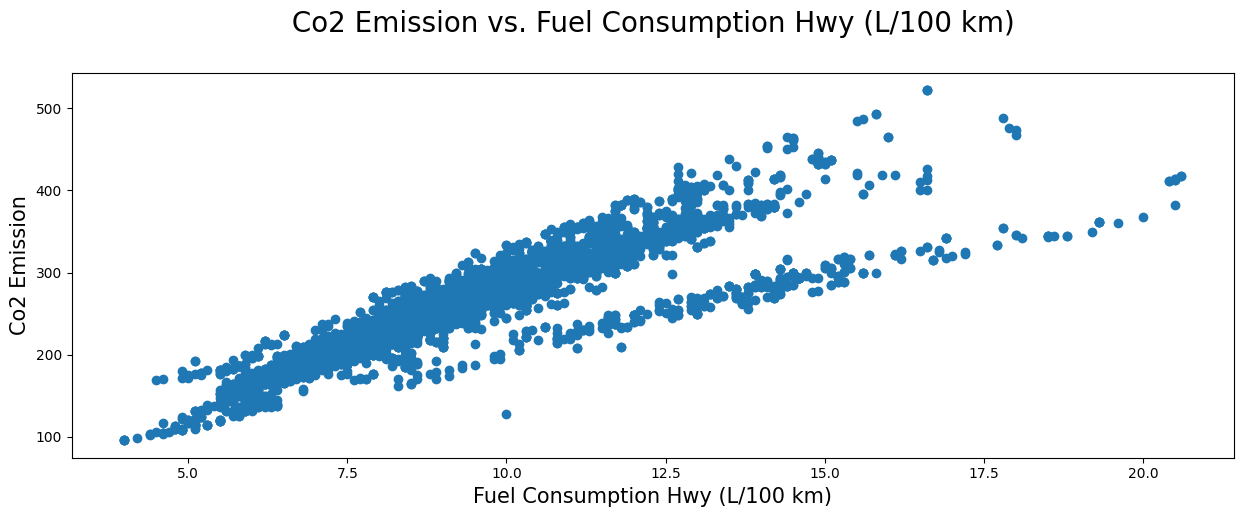

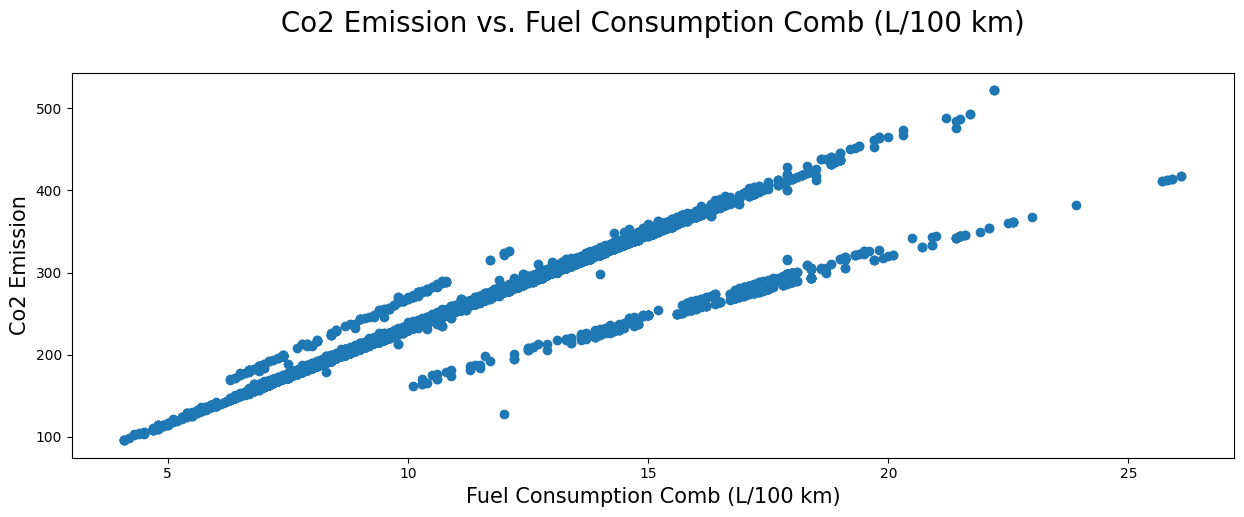

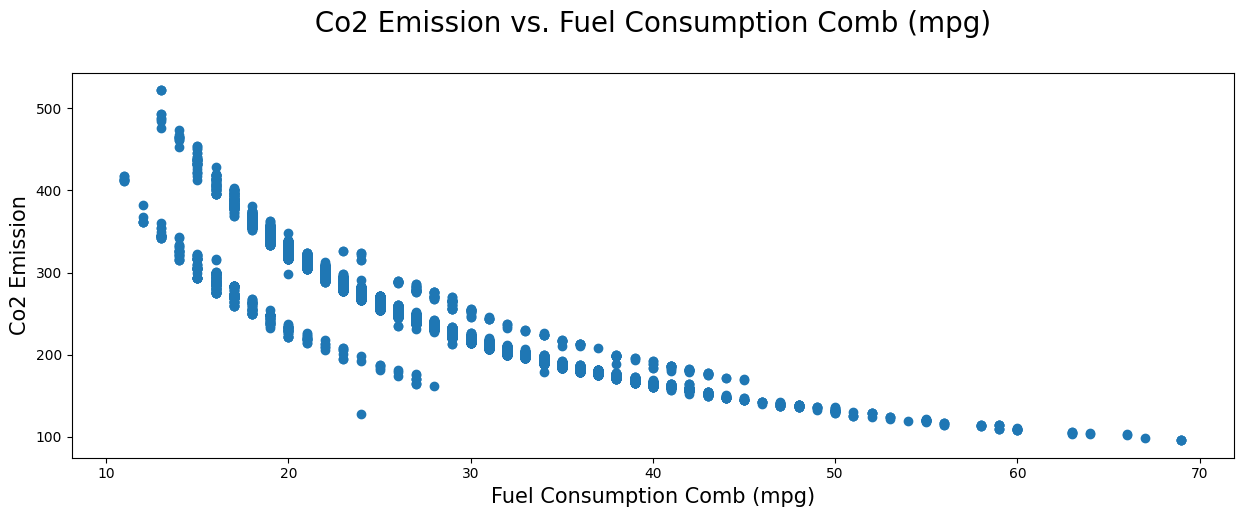

In [7]:
for feature in list(dataset.columns)[-5:-1]:
    explore_num_feature(feature)

creating a basic training set with input and labels

In [8]:
x = one_hot_data.drop(['CO2 Emissions(g/km)'], axis= 1)
y = one_hot_data["CO2 Emissions(g/km)"]

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import math

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)

print('Training Accuracy: ', knn.score(x_train, y_train)*100)
print('Testing Accuracy: ', knn.score(x_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  99.34909156424364
Testing Accuracy:  99.07465884809002
Root Mean Squared Error:  5.618289415918146


In [11]:
unique_values = {column: dataset[column].unique() for column in ['Make', 'Model', "Vehicle Class", "Transmission", "Fuel Type"]}

In [12]:
unique_values

{'Make': array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
        'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
        'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
        'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
        'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
        'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
        'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
       dtype=object),
 'Model': array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
        'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
        'XC40 T4 AWD'], dtype=object),
 'Vehicle Class': array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
        'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
        'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
        'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
        'STATION WA

In [51]:
car = {}
for car_brand in unique_values['Make']:
    car[car_brand] = {}
    filt1 = (dataset['Make'] == car_brand)
    for car_model in dataset.loc[filt1, 'Model'].unique():
        filt = (filt1) & (dataset['Model'] == car_model)
        car[car_brand][car_model] = {
            "Fuel" : list(dataset.loc[filt, 'Fuel Type'].unique()),
            "Transmission": list(dataset.loc[filt, 'Transmission'].unique()),
            "Type": list(dataset.loc[filt, 'Vehicle Class'].unique())
        }
        

In [53]:
car

{'ACURA': {'ILX': {'Fuel': ['Z'],
   'Transmission': ['AS5', 'M6', 'AM8'],
   'Type': ['COMPACT']},
  'ILX HYBRID': {'Fuel': ['Z'], 'Transmission': ['AV7'], 'Type': ['COMPACT']},
  'MDX 4WD': {'Fuel': ['Z'], 'Transmission': ['AS6'], 'Type': ['SUV - SMALL']},
  'RDX AWD': {'Fuel': ['Z'],
   'Transmission': ['AS6', 'AS10'],
   'Type': ['SUV - SMALL']},
  'RLX': {'Fuel': ['Z'], 'Transmission': ['AS6'], 'Type': ['MID-SIZE']},
  'TL': {'Fuel': ['Z'], 'Transmission': ['AS6'], 'Type': ['MID-SIZE']},
  'TL AWD': {'Fuel': ['Z'],
   'Transmission': ['AS6', 'M6'],
   'Type': ['MID-SIZE']},
  'TSX': {'Fuel': ['Z'], 'Transmission': ['AS5', 'M6'], 'Type': ['COMPACT']},
  'MDX SH-AWD': {'Fuel': ['Z'],
   'Transmission': ['AS6', 'AS9'],
   'Type': ['SUV - SMALL']},
  'RLX HYBRID': {'Fuel': ['Z'], 'Transmission': ['AM7'], 'Type': ['MID-SIZE']},
  'TLX': {'Fuel': ['Z'], 'Transmission': ['AM8', 'AS9'], 'Type': ['COMPACT']},
  'TLX SH-AWD': {'Fuel': ['Z'], 'Transmission': ['AS9'], 'Type': ['COMPACT']},
  